In [40]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import factorial
import math
# import csv
from matplotlib import rc, rcParams

[['1', '0:00:06', '1/1/2019', 170, '64.00', '9.00', '5.92', '24.32', '102165.39', '48034', '0', 'DorothyHodgkin2'], ['2', '0:00:06', '1/1/2019', 422, '787.00', '25.00', '19.33', '24.32', '102165.39', '6272', '0', 'DorothyHodgkin2'], ['3', '0:00:07', '1/1/2019', 1964, '71.00', '8.00', '5.99', '24.32', '102166.55', '97923', '0', 'DorothyHodgkin2'], ['4', '0:00:07', '1/1/2019', 1984, '861.00', '67.00', '24.50', '24.32', '102166.55', '1836', '0', 'DorothyHodgkin2'], ['5', '0:00:09', '1/1/2019', 3278, '72.00', '8.00', '6.00', '24.31', '102167.14', '49880', '0', 'DorothyHodgkin2'], ['6', '0:00:09', '1/1/2019', 3298, '123.00', '8.00', '7.24', '24.31', '102167.14', '1836', '0', 'DorothyHodgkin2'], ['7', '0:00:10', '1/1/2019', 4202, '617.00', '9.00', '14.23', '24.31', '102168.14', '49879', '0', 'DorothyHodgkin2'], ['8', '0:00:10', '1/1/2019', 4397, '973.00', '353.00', '66.42', '24.31', '102168.14', '3995', '0', 'DorothyHodgkin2'], ['9', '0:00:12', '1/1/2019', 6309, '88.00', '8.00', '6.30', '24.

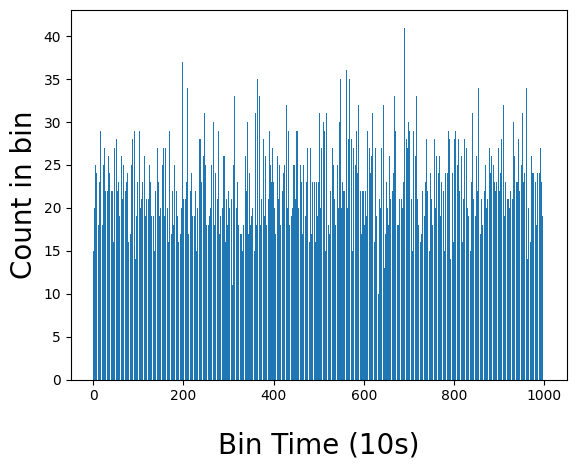

In [56]:
with open('DorothyFileC050.txt', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
    line = file.readline()
    while line[0] == "#":
        line = file.readline()
    data1 = [line.split()]
    data1[0][3] = int(data1[0][3])
    time = data1[0][3]
    numbins = 1000
    intervalrange = 10

    # i = 1
    while time < numbins * intervalrange * 1000:
        data1 += [file.readline().split()]
        data1[-1][3] = int(data1[-1][3])
        time = data1[-1][3]
        # i += 1

print(data1)

# data1 = data1[500:]

ind = 0
bins = []

for interval in range(1, numbins + 1):
    count = 0
    while data1[ind][3] < interval * 1000 * intervalrange:
        count += 1
        ind += 1

    bins += [count]

print(bins)

plt.bar(np.arange(1,numbins + 1), bins)
plt.xlabel(r'Bin Time (10s)', fontsize=20, labelpad=20)
plt.ylabel(r'Count in bin', fontsize=20)
plt.show()

# lines = [line.strip() for line in lines]
# data = [int(line) for line in lines if line.isdigit()]
# print(data)

In [57]:
cumulativeaverage = np.cumsum(bins) / np.arange(1, numbins + 1)
stds = np.sqrt(cumulativeaverage / np.arange(1, numbins + 1))

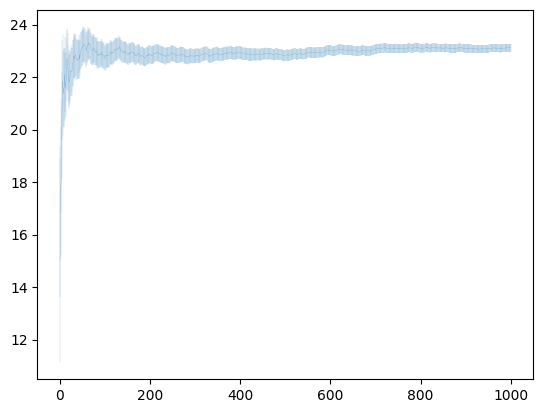

In [58]:
plt.errorbar(np.arange(1, numbins+1), cumulativeaverage, yerr = stds, lw=0.1)
plt.show()

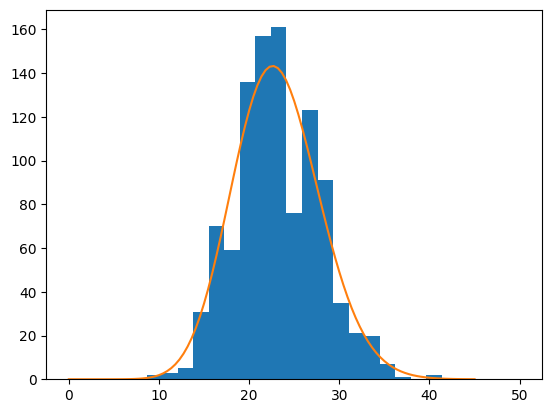

In [82]:
binedges = np.linspace(0, 50, 30)
binvalues = plt.hist(bins, binedges)
def poisson(x, lam, a):
    return a * lam**x * np.exp(-lam)/factorial(x)
x = np.linspace(0, 45, 100)
# plt.show()
plt.plot(x, poisson(x, cumulativeaverage[-1], numbins * 50 / 29))
# bincenters = (binedges[1:] + binedges[:-1])/2
# plt.plot(bincenters, poisson(bincenters, cumulativeaverage[-1], 1))
plt.show()

In [92]:
np.sum((poisson(bincenters, cumulativeaverage[-1], numbins * 50 / 29) - binvalues[0]) ** 2 / ((np.sqrt(cumulativeaverage[-1])) ** 2))

np.float64(247.65084993912143)

In [85]:
len(binvalues[0])

29